# Imported accesories

In [150]:
import numpy as np
from vector_class import TripleVector
import matplotlib.pyplot as plt
import random


# Parameters

In [30]:
A0 = 100 # Bq
Ab = 5 # Bq
h = 1 # m
D_t = 10 # the pause on each point od the grid in s
x_max = 4 # m
y_max = 4 # m
#grid

np.linspace(-3, 3, 4)

array([-3., -1.,  1.,  3.])

# Flying over the surface

In [167]:
from tokenize import Triple

def I(A0, r, D_t):
    return (1 / (r + 1)**2) * A0 * D_t

def point_source(x_max, y_max):
    return [random.uniform(-x_max, x_max),random.uniform(-y_max, y_max)]

def flyOver(A0, Ab, D_t, h, x_max, y_max, square):
    if (x_max/square % 2) != 0 or (y_max/square % 2) != 0:
        return "Error: Not valid grid size or division"
    xes = np.linspace(-x_max + square/2, x_max - square/2, int(2*x_max/square))
    source = point_source(x_max, y_max)
    intensities = np.zeros((int(2*(x_max/square)), int(2*(y_max/square))))
    intensities_list = []
    grid_x, grid_y = np.zeros((int(2*(x_max/square)), int(2*(y_max/square)))), np.zeros((int(2*(x_max/square)), int(2*(y_max/square))))
    n, m = int(2*(x_max/square)) - 1, 0
    i = 1
    y = -y_max + square/2
    for x in xes:
        while abs(y) <= y_max:
            drone = TripleVector(x, y, h)
            position = TripleVector(source[0], source[1], 0)
            r_vector = drone - position
            r = r_vector.magnitude()
            intensity = I(A0, r, D_t)
            if Ab*D_t > intensity:
                return "Backround signal to strong"
            intensities[n, m] = intensity
            intensities_list.append(intensity)
            grid_x[n, m], grid_y[n, m] = x, y
            # print(intensities)
            # grid = np.vstack((grid, np.array((x, y))))
            y += (square)*i

            n -= 1*i
        n += 1*i
        i = i * (-1)
        y += (square)*i
        m += 1

    return [intensities[:, :], source, intensities_list, grid_x, grid_y]

# source, A0, Ab, D_t, h, x_max, y_max, square
measurement = flyOver(1000, 5, 10, 6, 4, 4, 1)

# print(measurement)



In [ ]:
# 

# Location from measurement

In [171]:
def close_numbers(measurement, n_bins):
    edge2, edge1 = np.max(measurement[0]), np.min(measurement[0])
    ran = np.linspace(edge1, edge2, n_bins)
    histogram = np.histogram(measurement[2], ran)
    print(max(histogram[0]))
    i = list(histogram[0]).index(max(histogram[0]))
    Range = histogram[1][i:(i+2)]
    n, m = measurement[0].shape
    X, Y = [], []
    for i in range(n):
        for j in range(m):
            if (Range[0] <= measurement[0][i, j] and measurement[0][i, j] <= Range[1]):
                X.append(measurement[3][i, j])
                Y.append(measurement[4][i, j])
    points = [np.array(X), np.array(Y)]
    return points

def circle_center(x, y, w=[]):
    A = np.array([x, y, np.ones(len(x))]).T
    b = x**2 + y**2
    
    # Modify A,b for weighted least squares
    if len(w) == len(x):
        W = np.diag(w)
        A = np.dot(W,A)
        b = np.dot(W,b)
    
    # Solve by method of least squares
    c = np.linalg.lstsq(A,b,rcond=None)[0]
    
    # Get circle parameters from solution c
    xc = c[0]/2
    yc = c[1]/2
    r = np.sqrt(c[2] + xc**2 + yc**2)
    return [xc, yc, r]

points = close_numbers(measurement, 30)
circle_values = circle_center(points[0], points[1])

4


# Visualization

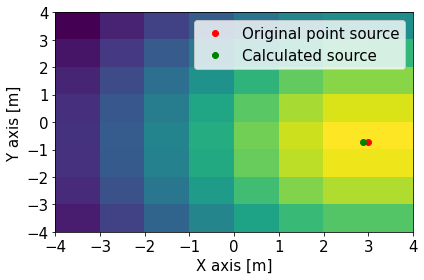

In [172]:
def visualize(measurement, x_max, y_max, circle_values):
    
    plt.imshow(measurement[0], extent=[-x_max,x_max,-y_max,y_max], aspect="auto")
    X, Y = measurement[1][0], measurement[1][1]
    plt.plot(X, Y, "o", color = 'r', label = "Original point source")
    plt.plot(circle_values[0], circle_values[1], "o", color = 'g', label = "Calculated source")
    plt.xlabel("X axis [m]", fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.ylabel("Y axis [m]", fontsize = 15)
    plt.yticks(fontsize = 15)

   
    plt.legend(fontsize = 15)
    #plt.grid()

    plt.tight_layout()
    #plt.savefig("")
    plt.show()

visualize(measurement, x_max, y_max, circle_values)

